In [1]:
import numpy as np
import matplotlib.pyplot as plt

from envs import Maze
from utils import plot_policy, plot_values, test_agent

pygame 2.1.2 (SDL 2.0.18, Python 3.8.0)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
env = Maze()

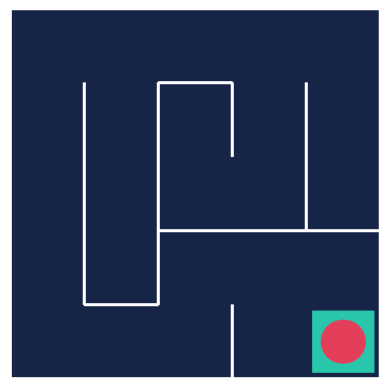

In [3]:
frame = env.render(mode='rgb_array')
plt.axis('off')
plt.imshow(frame)

In [4]:
print(env.observation_space.nvec)
print(env.action_space.n)

[5 5]
4


In [5]:
policy_probs = np.full((5,5,4),0.25)
policy_probs

array([[[0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25]],

       [[0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25]],

       [[0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25]],

       [[0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25]],

       [[0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25]]])

In [6]:
def policy(state):
    return policy_probs[state]

In [7]:
action_probabilities = policy((0,0))
for action, prob in zip(range(4), action_probabilities):
    print(f'probability of taking action {action}:{prob}')

probability of taking action 0:0.25
probability of taking action 1:0.25
probability of taking action 2:0.25
probability of taking action 3:0.25


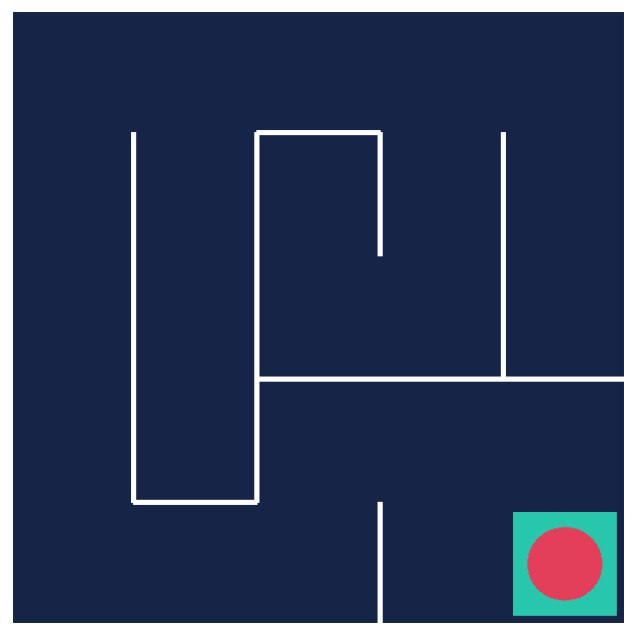

In [8]:
test_agent(env, policy, episodes=1)

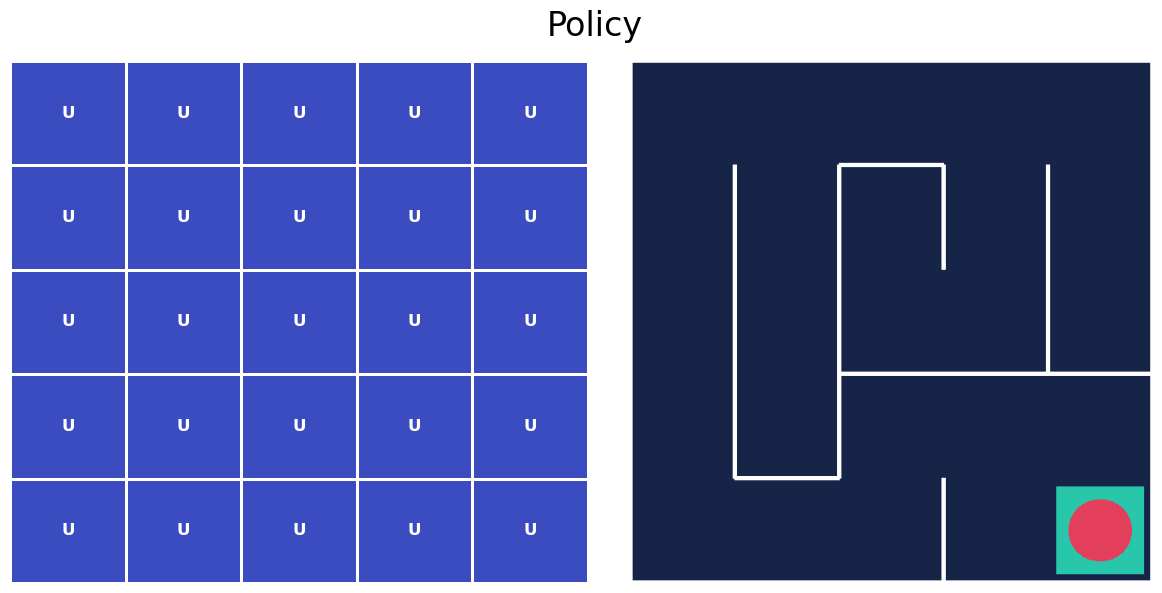

In [9]:
plot_policy(policy_probs, frame)

In [10]:
state_values = np.zeros(shape=(5,5))

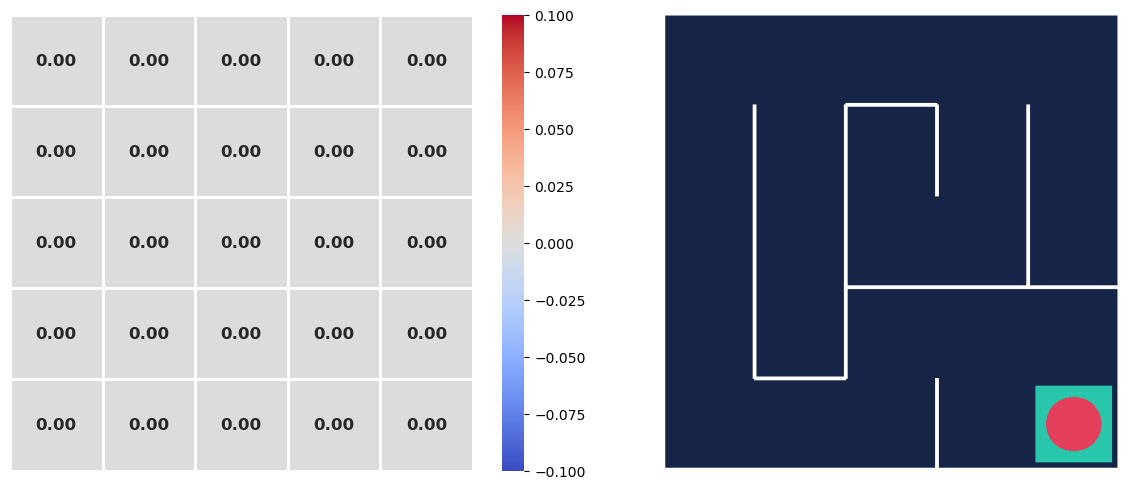

In [11]:
plot_values(state_values, frame)

In [12]:
def policy_evaluation(policy_probs, state_values, theta=1e-6, gamma=0.99):
    delta = float("inf")
    while delta > theta:
        delta = 0
        for row in range(5):
            for col in range(5):
                old_value = state_values[(row, col)]
                new_value = 0.
                action_probabilities = policy_probs[(row, col)]
                for action, prob in enumerate(action_probabilities):
                    next_state, reward, _, _ = env.simulate_step((row, col), action)
                    new_value += prob *(reward+gamma*state_values[next_state])

                state_values[(row, col)] = new_value
                delta = max(delta, abs(old_value-new_value))

In [19]:
def policy_improvement(policy_probs, state_values, gamma=0.99):
    policy_stable = True
    for row in range(5):
        for col in range(5):
            old_action = policy_probs[(row, col)].argmax()
            new_action = None
            max_qsa = float("-inf")
            for action in range(4):
                next_state, reward, _, _ = env.simulate_step((row, col), action)
                qsa = reward +gamma *state_values[next_state]
                if qsa > max_qsa:
                    new_action = action
                    max_qsa = qsa
            action_probs = np.zeros(4)
            action_probs[new_action] = 1.
            policy_probs[(row,col)] = action_probs

            if new_action != old_action:
                policy_stable = False
    return policy_stable

In [20]:
def policy_iteration(policy_prob, state_values, theta=1e-6, gamma=0.99):
    policy_stable = False
    while not policy_stable:
        policy_evaluation(policy_probs, state_values, theta, gamma)
        plot_values(state_values, frame)
        policy_stable = policy_improvement(policy_probs, state_values, gamma)
        plot_policy(policy_prob, frame)

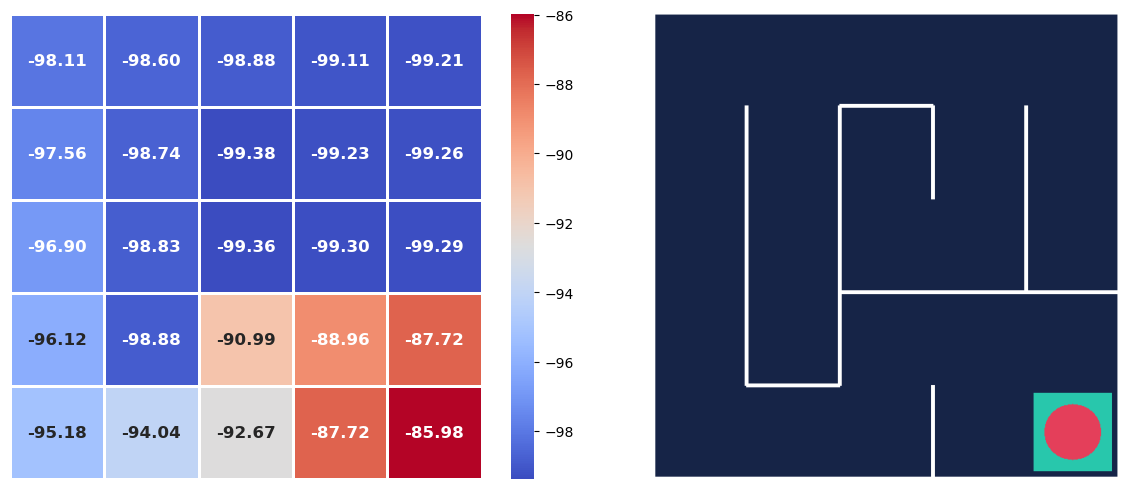

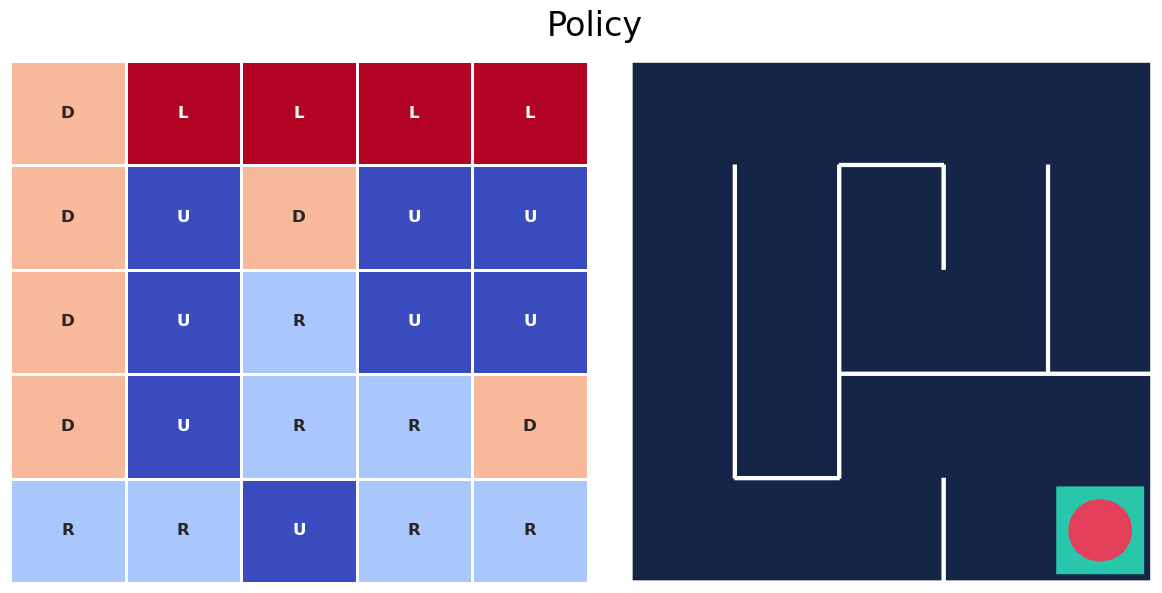

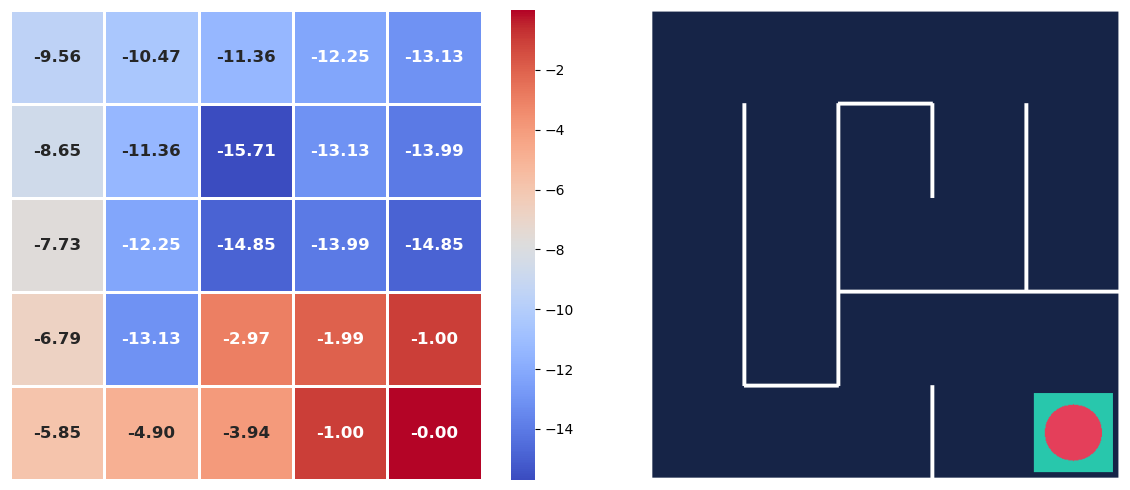

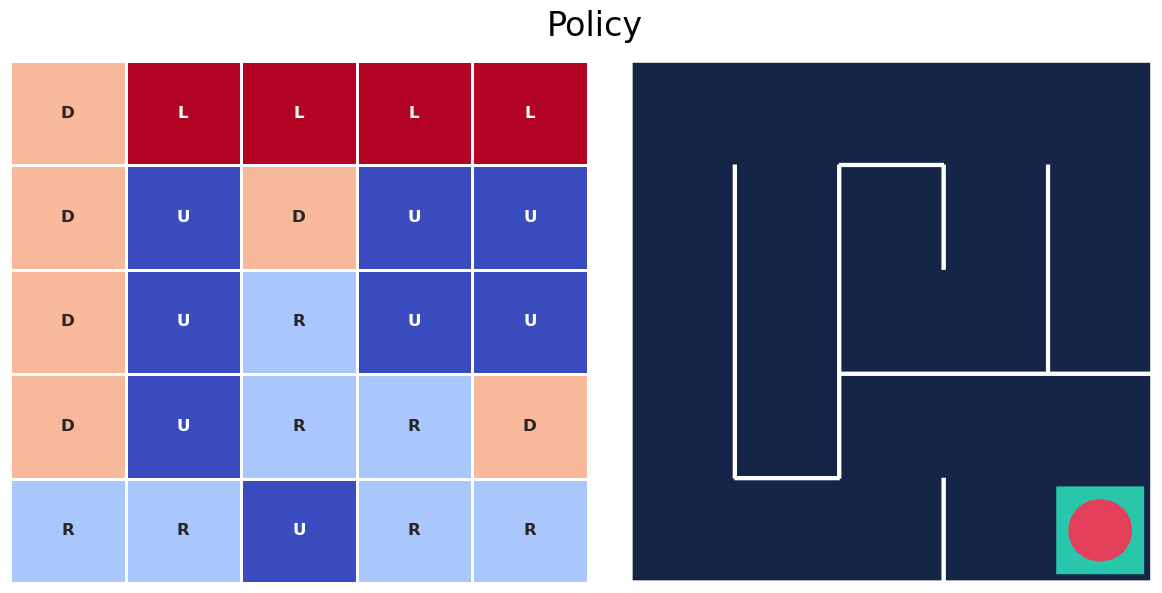

In [21]:
policy_iteration(policy_probs, state_values)

KeyboardInterrupt: 

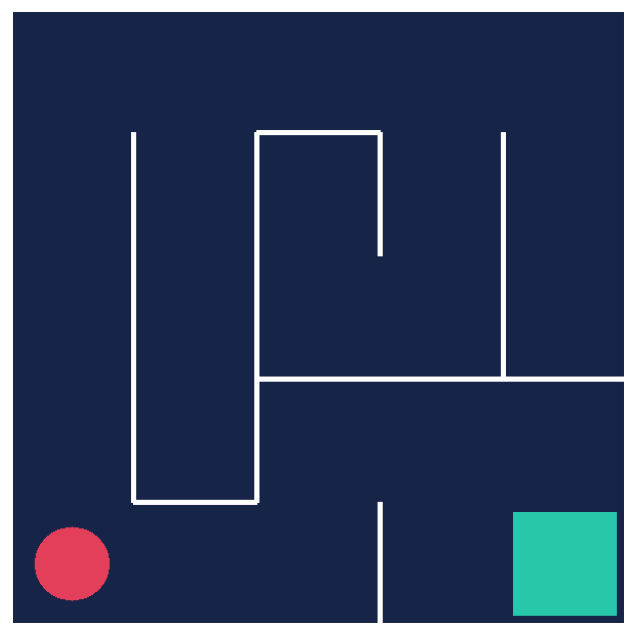

In [22]:
test_agent(env, policy)